In [3]:
import pandas as pd 
import numpy as np  
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb 
import plotly.subplots as sp
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Importing dataset
df=pd.read_csv('Dataset-Mental-Disorders.csv',index_col='Patient Number')
df.head(2)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression


In [5]:
#summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, Patiant-01 to Patiant-120
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 

In [6]:
# unique values in each columns
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

Sadness: ['Usually' 'Sometimes' 'Seldom' 'Most-Often']
Euphoric: ['Seldom' 'Most-Often' 'Usually' 'Sometimes']
Exhausted: ['Sometimes' 'Usually' 'Seldom' 'Most-Often']
Sleep dissorder: ['Sometimes' 'Most-Often' 'Usually' 'Seldom']
Mood Swing: ['YES' 'NO']
Suicidal thoughts: ['YES ' 'YES' 'NO']
Anorxia: ['NO' 'YES']
Authority Respect: ['NO' 'YES']
Try-Explanation: ['YES' 'NO']
Aggressive Response: ['NO' 'YES']
Ignore & Move-On: ['NO' 'YES']
Nervous Break-down: ['YES' 'NO']
Admit Mistakes: ['YES' 'NO']
Overthinking: ['YES' 'NO']
Sexual Activity: ['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']
Concentration: ['3 From 10' '2 From 10' '5 From 10' '4 From 10' '7 From 10' '6 From 10'
 '1 From 10' '8 From 10']
Optimisim: ['4 From 10' '5 From 10' '7 From 10' '2 From 10' '6 From 10' '9 From 10'
 '3 From 10' '8 From 10' '1 From 10']
Expert Diagnose: ['Bipolar Type-2' 'Depression' 'Bipolar Type-1' 'Normal']


In [7]:
# merging same values in 'Suicidal thoughts' column
df.loc[df[df['Suicidal thoughts']=='YES ']['Suicidal thoughts'].index[0],'Suicidal thoughts']='YES'

In [ ]:
# # drawing plot for each columns

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)# Suppress FutureWarning messages

# for i in df.columns[4:-4]:
#     table=pd.pivot_table(df,index='Expert Diagnose',aggfunc='count',columns=i,values='Optimisim')
#     plot=px.bar(table,color_discrete_sequence=['red','green'],labels={'value':'Count'},title=f"Having {i} in each groups")
#     plot.show()
    
    
# dic=dict()
# values=['blue','purple','black','orange','red','skyblue','green']
# keys=df.columns[:-1].drop(df.columns[4:-4])
# for i in range(len(keys)):
#        dic.update({keys[i]:values[i]})


# for i in range(7):
   
#       plott=px.density_heatmap(data_frame=df,x='Expert Diagnose',y=list(dic)[i],color_continuous_scale=['white',list(dic.values())[i]])
#       plott.update_layout(go.Layout(yaxis={'categoryarray':df[list(dic)[i]].sort_values(inplace=False).unique(),'title':list(dic)[i]},xaxis={'categoryarray':['Bipolar Type-1','Bipolar Type-2','Depression','Normal']},hovermode='closest'))
#       plott.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [9]:
# We have catogorical features, so we need to encode them

from sklearn.preprocessing import LabelEncoder
encoders={} 
for i in df.columns[:-1]:
    encoders[i]=LabelEncoder() 
    encoders[i].fit(df[i])
    df[i]=encoders[i].transform(df[i])

In [10]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,Bipolar Type-2
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,Depression
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,Bipolar Type-1
Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,Bipolar Type-2
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,Depression
Patiant-117,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,Bipolar Type-1
Patiant-118,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,Bipolar Type-2


In [14]:
# Encode label
le = LabelEncoder()
df['Expert Diagnose'] = le.fit_transform(df['Expert Diagnose'])

# Pisahkan fitur dan label
X = df.drop('Expert Diagnose', axis=1)
y = df['Expert Diagnose']

# Train model
model = RandomForestClassifier()
model.fit(X, y)

# Tampilkan importance
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                Feature  Importance
4            Mood Swing    0.241784
16            Optimisim    0.157528
14      Sexual Activity    0.114024
5     Suicidal thoughts    0.064914
0               Sadness    0.064809
1              Euphoric    0.057047
15        Concentration    0.044435
2             Exhausted    0.037810
3       Sleep dissorder    0.034336
9   Aggressive Response    0.033254
7     Authority Respect    0.030833
13         Overthinking    0.026987
11   Nervous Break-down    0.024526
6               Anorxia    0.019632
10     Ignore & Move-On    0.019120
12       Admit Mistakes    0.015614
8       Try-Explanation    0.013348


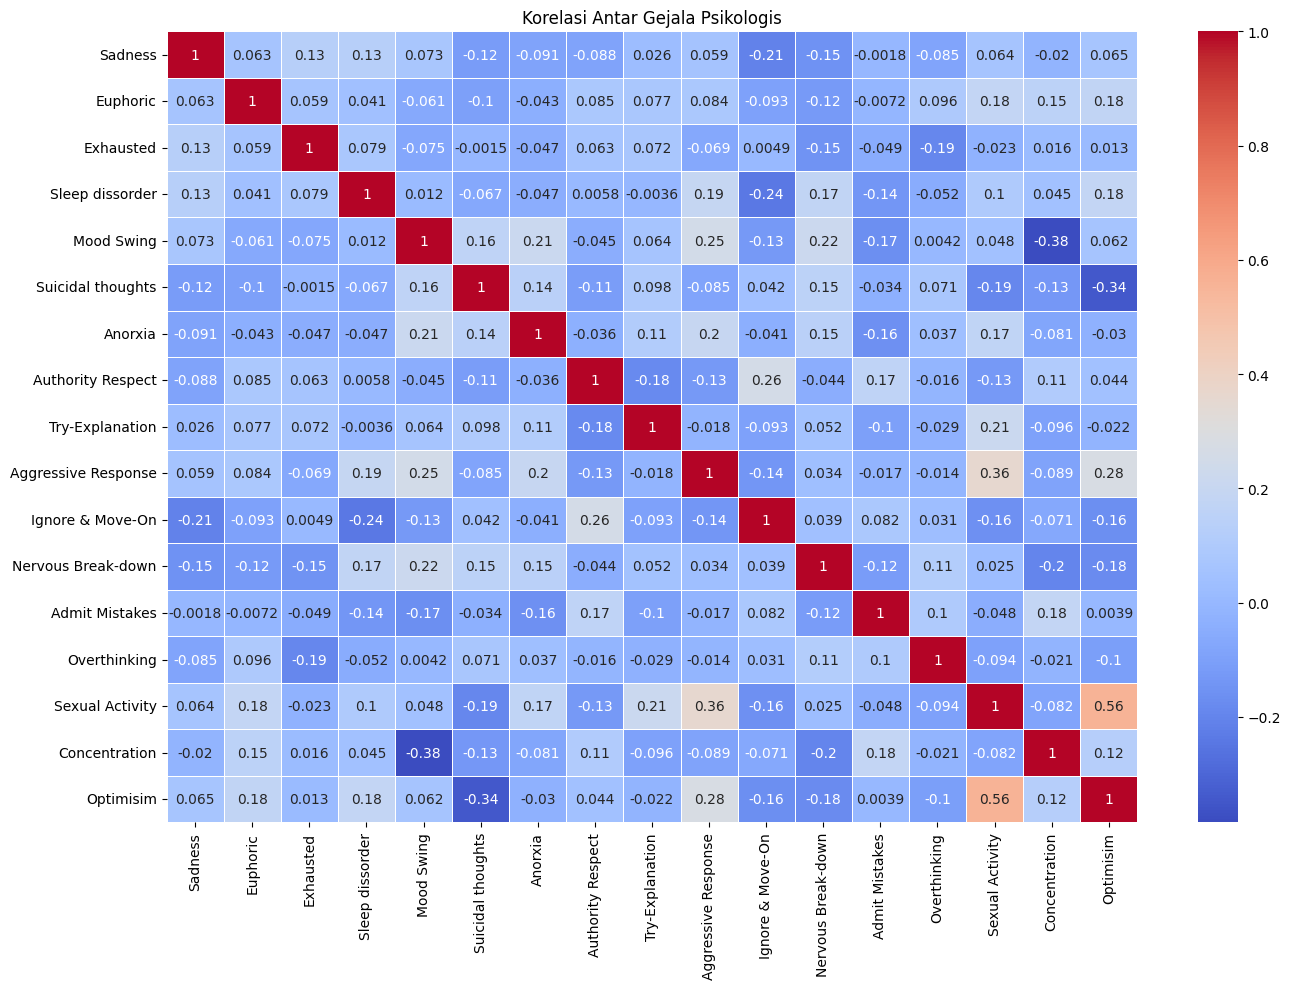

In [12]:
import seaborn as sns
columns = [
    "Sadness", "Euphoric", "Exhausted", "Sleep dissorder", "Mood Swing",
    "Suicidal thoughts", "Anorxia", "Authority Respect", "Try-Explanation",
    "Aggressive Response", "Ignore & Move-On", "Nervous Break-down",
    "Admit Mistakes", "Overthinking", "Sexual Activity", "Concentration", "Optimisim"
]

df_selected = df[columns]

# Hitung korelasi antar kolom
corr = df_selected.corr()

# Buat heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi Antar Gejala Psikologis")
plt.tight_layout()
plt.show()

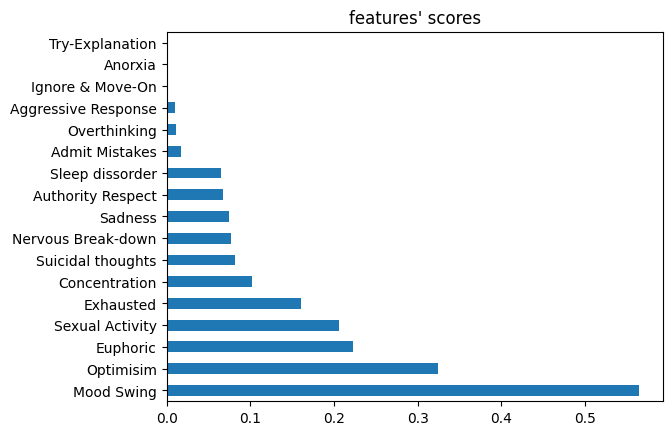

In [ ]:
# Selecting best features in order to increase model's performance
d
from sklearn.feature_selection import mutual_info_classif
feature_selection=SelectKBest(score_func=mutual_info_classif)
feature_selection=feature_selection.fit(df[df.columns[:-1]],df[df.columns[-1]])

features_scores=pd.Series(feature_selection.scores_,df.columns[:-1])
features_scores.nlargest(18).plot(kind='barh',title="features' scores")
plt.show()

In [ ]:
# defining train and test set
x_train,x_test,y_train,y_test=train_test_split(df[features_scores.nlargest(5).index],df[df.columns[-1]],test_size=0.3,random_state=2,shuffle=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = {
    'bootstrap': [True],
    'max_depth': [120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [ 10, 12],
    'n_estimators': [ 300, 1000]
}

# Create a based model
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2,scoring='accuracy')

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [120],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [10, 12],
                         'n_estimators': [300, 1000]},
             scoring='accuracy', verbose=2)

In [ ]:
# best parameters for model
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 120,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
y_predict=grid_search.predict(x_test)
print(classification_report(y_test,y_predict))

                precision    recall  f1-score   support

Bipolar Type-1       1.00      0.88      0.93         8
Bipolar Type-2       0.91      1.00      0.95        10
    Depression       0.75      0.75      0.75         8
        Normal       0.80      0.80      0.80        10

      accuracy                           0.86        36
     macro avg       0.86      0.86      0.86        36
  weighted avg       0.86      0.86      0.86        36



In [ ]:
df

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
Patient Number,,,,,,,,,,,,,,,,,,
Patiant-01,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,Bipolar Type-2
Patiant-02,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,Depression
Patiant-03,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,Bipolar Type-1
Patiant-04,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,Bipolar Type-2
Patiant-05,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patiant-116,0,1,3,2,0,1,0,0,1,0,1,0,0,1,1,4,2,Depression
Patiant-117,2,2,2,1,1,0,0,0,0,1,0,0,0,1,5,6,7,Bipolar Type-1
Patiant-118,3,2,3,2,1,0,1,1,0,0,0,1,0,1,0,4,2,Bipolar Type-2
